In [322]:
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot

In [323]:
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.pylab import rcParams

In [324]:
rcParams['figure.figsize'] = 10, 6

In [325]:
%matplotlib inline

In [326]:
tesla = pd.read_csv('TSLA.csv')

In [327]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [328]:
tesla.drop(['Open','High','Low','Close','Adj Close'], axis=1, inplace=True)

In [329]:
tesla.head()

,Date,Volume
0,2010-06-29,18766300
1,2010-06-30,17187100
2,2010-07-01,8218800
3,2010-07-02,5139800
4,2010-07-06,6866900


In [330]:
tesla.tail()

,Date,Volume
2411,2020-01-28,11788500
2412,2020-01-29,17801500
2413,2020-01-30,29005700
2414,2020-01-31,15719300
2415,2020-02-03,47065000


In [331]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 2 columns):
Date      2416 non-null object
Volume    2416 non-null int64
dtypes: int64(1), object(1)
memory usage: 37.9+ KB


In [332]:
tesla['Date'] = pd.date_range(start='2010-06-29', periods=2416, freq='D')

In [333]:
tesla['Year'] = tesla['Date'].dt.year
tesla['Month'] = tesla['Date'].dt.month

In [334]:
tesla.head()

,Date,Volume,Year,Month
0,2010-06-29,18766300,2010,6
1,2010-06-30,17187100,2010,6
2,2010-07-01,8218800,2010,7
3,2010-07-02,5139800,2010,7
4,2010-07-03,6866900,2010,7


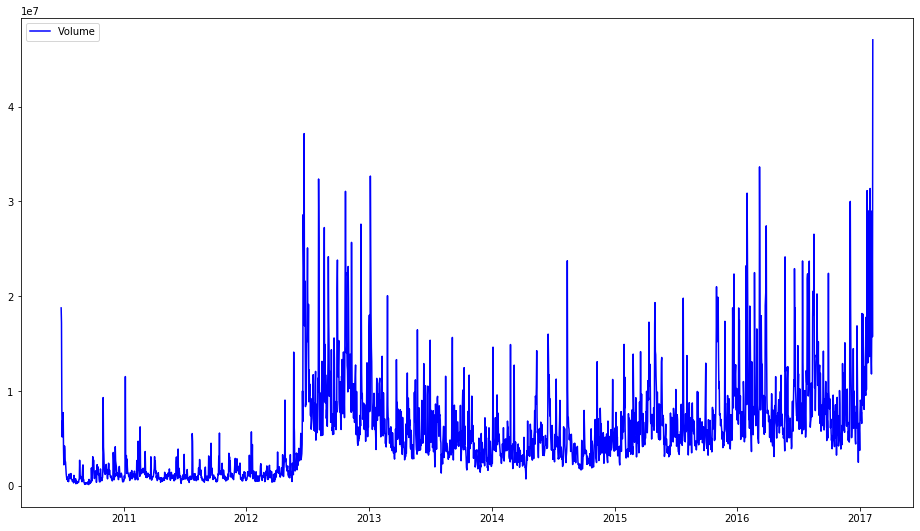

In [335]:
plt.figure(figsize=(16, 9))
plt.plot(tesla['Date'], tesla['Volume'], label='Volume', color='blue')
plt.legend(loc='best')
plt.show()

In [336]:
tesla = tesla.groupby(['Year','Month'])['Volume'].mean()

To avoid over training of model I am taking a mean value from every month

In [337]:
tesla.head()

Year  Month
2010  6        1.797670e+07
      7        2.361035e+06
      8        6.549258e+05
      9        5.404900e+05
      10       1.276445e+06
Name: Volume, dtype: float64

In [338]:
tesla = pd.DataFrame(tesla)

In [339]:
len(tesla)

81

Encoding date as a number of month in a row

In [340]:
d1 = {"Sart":"2010-6", "end":"2017-2"}

In [341]:
date_code = pd.DataFrame(d1, index = [0])

In [342]:
date_code

,Sart,end
0,2010-6,2017-2


In [343]:
tesla['Month'] = np.arange(0, len(tesla), 1)

In [344]:
tesla.set_index('Month', inplace=True)

In [345]:
tesla = tesla['Volume']

In [346]:
tesla = pd.DataFrame(tesla)

In [347]:
tesla.head()

,Volume
Month,
0,1.797670e+07
1,2.361035e+06
2,6.549258e+05
3,5.404900e+05
4,1.276445e+06


In [348]:
tesla = tesla.apply(lambda x: round(x, 2))

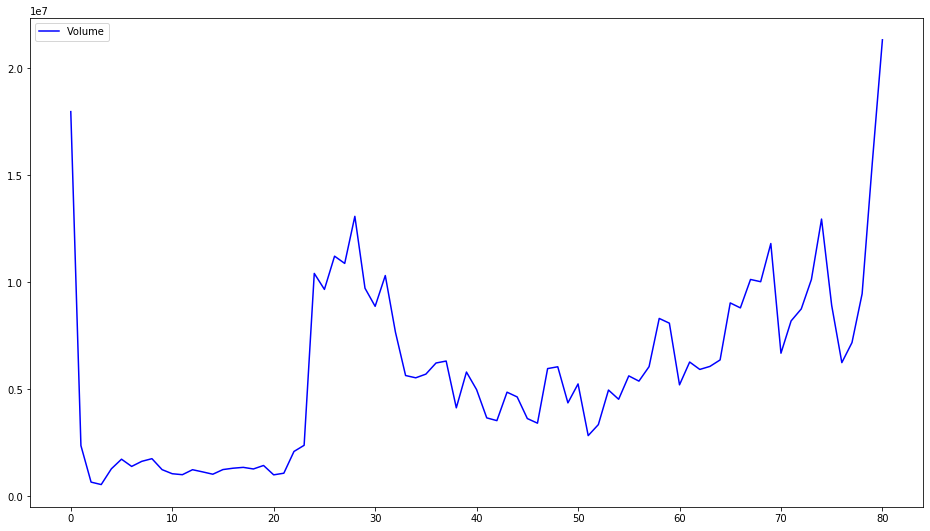

In [359]:
plt.figure(figsize=(16, 9))
plt.plot(tesla, label='Volume', color='blue')
plt.legend(loc='best')
plt.show()

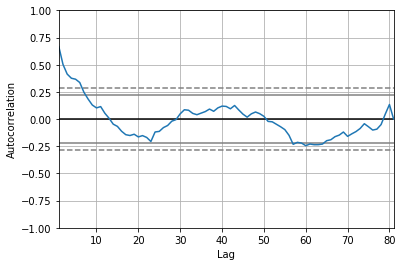

In [360]:
autocorrelation_plot(tesla)

In [363]:
r_mean = tesla.rolling(window=10).mean()
r_std = tesla.rolling(window=10).std()

In [366]:
r_mean.sample()

,Volume
Month,
17,1232041.625


In [367]:
r_std.sample()

,Volume
Month,
69,2.270094e+06


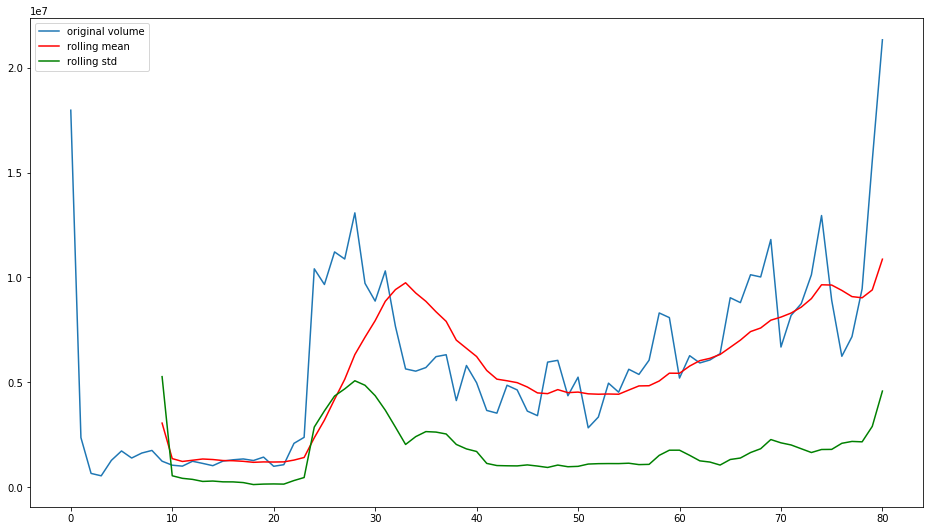

In [368]:
plt.figure(figsize=(16, 9))
plt.plot(tesla, label='original volume')
plt.plot(r_mean, color='red', label='rolling mean')
plt.plot(r_std, color='green', label='rolling std')
plt.legend(loc='best')
plt.show()

In [369]:
from statsmodels.tsa.stattools import adfuller

In [384]:
print("Results of adfuller test for tesla:")
test = adfuller(tesla['Volume'], autolag="AIC")

output = pd.DataFrame(test[:4], index = ["test", 'p', "lags", "observations"])

for key, value  in test[4].items():
    output['Critical Value (%s)'%key] = value
    
print(output)

Results of adfuller test for tesla:
                      0  Critical Value (1%)  Critical Value (5%)  \
test          -2.624831            -3.514869            -2.898409   
p              0.087973            -3.514869            -2.898409   
lags           0.000000            -3.514869            -2.898409   
observations  80.000000            -3.514869            -2.898409   

              Critical Value (10%)  
test                     -2.586439  
p                        -2.586439  
lags                     -2.586439  
observations             -2.586439  


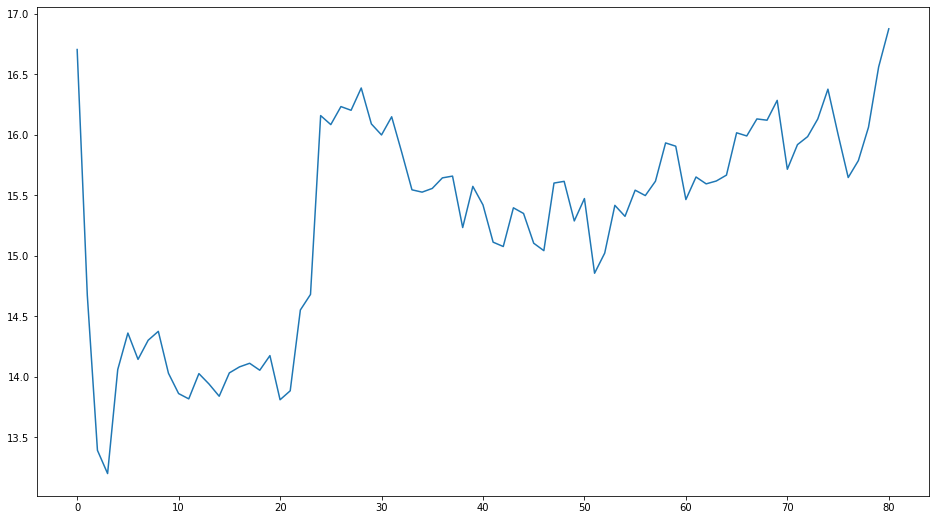

In [385]:
tesla_log = np.log(tesla)
plt.figure(figsize=(16, 9))
plt.plot(tesla_log)

In [412]:
def test(time_series):
    moving_avg = time_series.rolling(window=10).mean()
    moving_std = time_series.rolling(window=10).std()
    

    plt.figure(figsize=(16, 9))
    plt.plot(time_series, label = "volume")
    plt.plot(moving_avg, color ="red" ,label = "moving average")
    plt.plot(moving_std, color= "green" ,label = "moving std")
    plt.legend(loc="best")
    plt.show()
    plt.figure(figsize=(16, 9))
    autocorrelation_plot(time_series)

Test for logarytmic time series

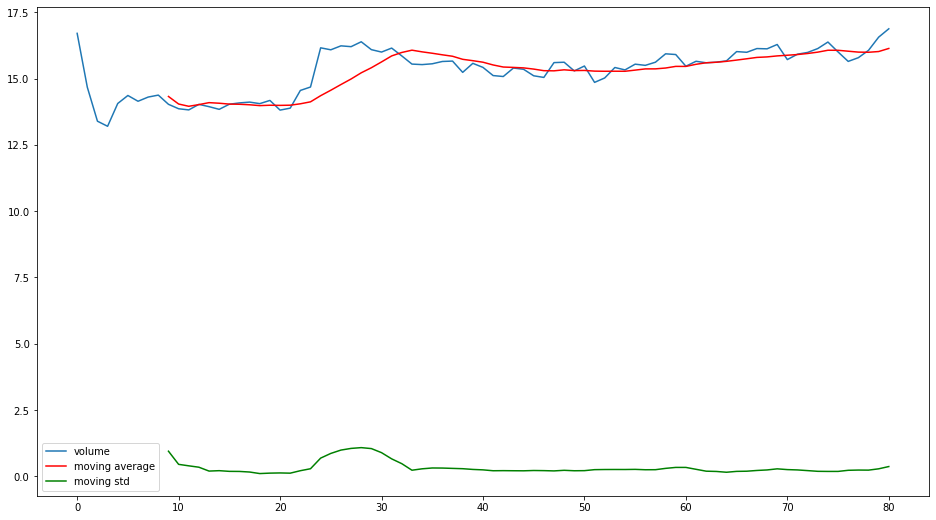

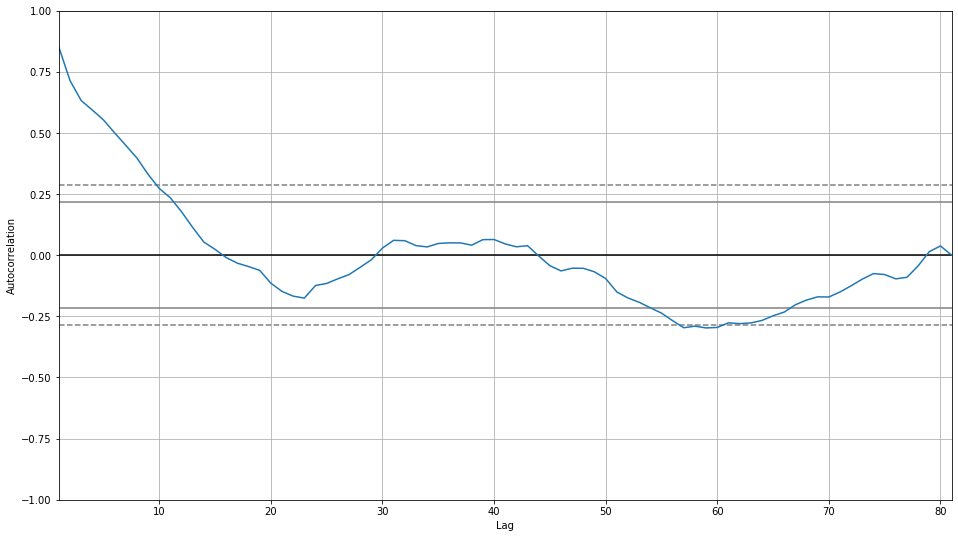

In [413]:
test(tesla_log)

In [414]:
tesla_diff = tesla_log - moving_avg

In [415]:
tesla_diff.dropna(axis=0, inplace=True)

test for differenced time series

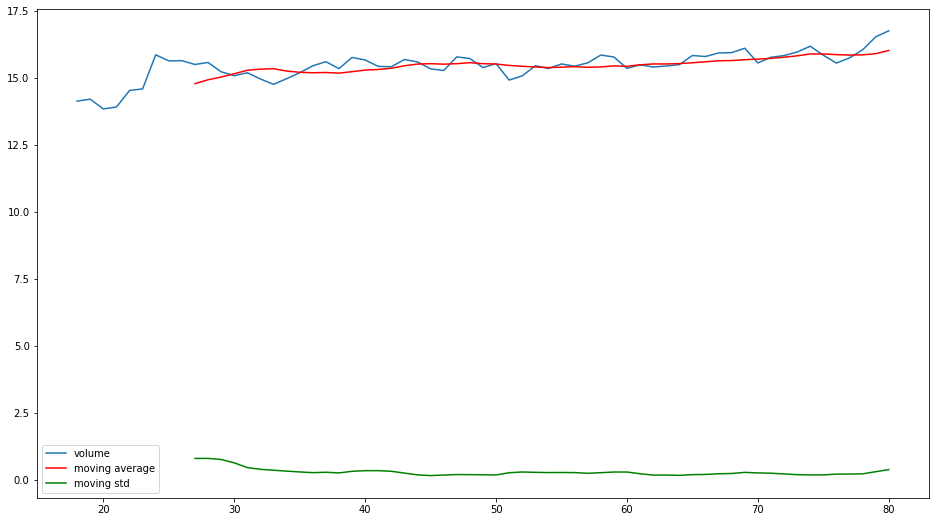

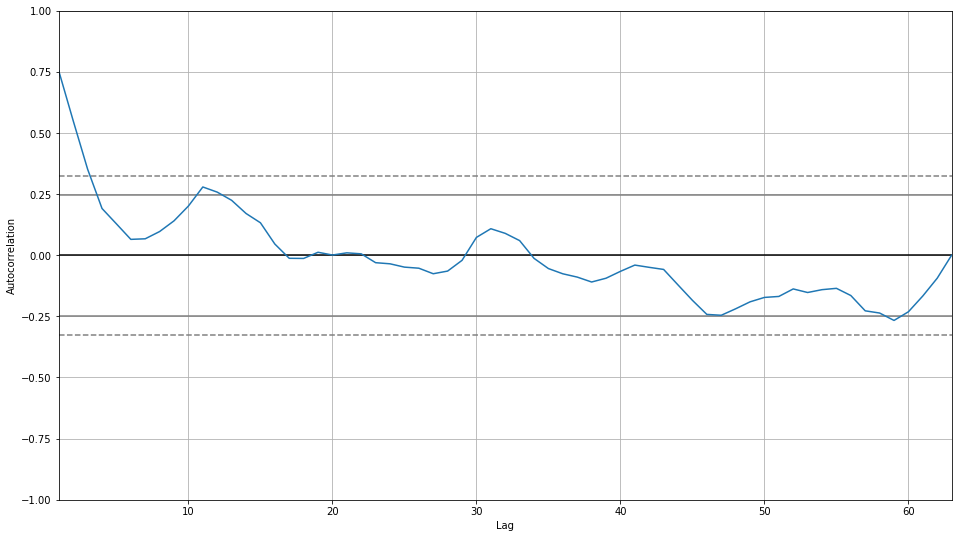

In [416]:
test(tesla_diff)

In [417]:
tesla_shift = tesla_log - tesla_log.shift()

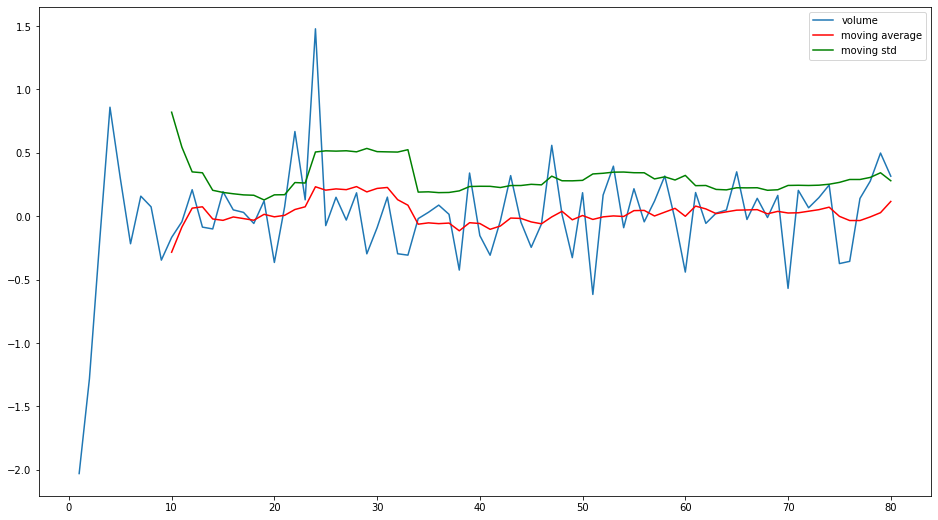

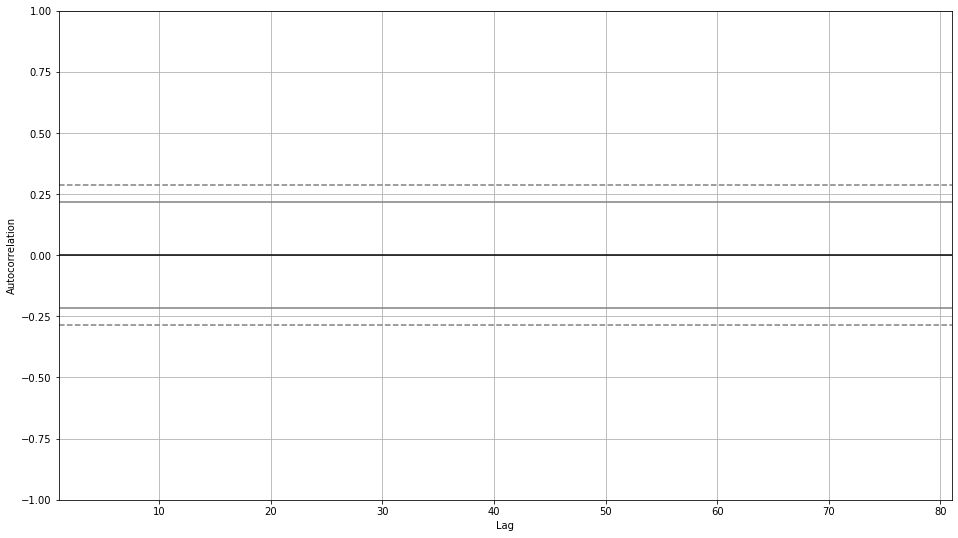

In [418]:
test(tesla_shift)

In [426]:
tesla_shift.dropna(axis=0, inplace=True)

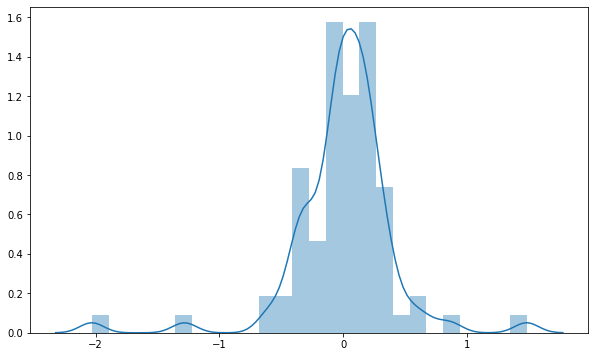

In [430]:
plt.figure(figsize=(10, 6))
sns.distplot(tesla_shift)

In [428]:
tesla_shift.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Volume,80.0,0.002141,0.413054,-2.029976,-0.113812,0.026747,0.184415,1.4778


Looking for best fitting predictions using ARIMA model

In [429]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [508]:
def modeling(series, order_tupple):
    model = ARIMA(series, order = order_tupple)
    result = model.fit(disp=-1)
    plt.figure(figsize=(10, 6))
    plt.plot(series, label = "volume")
    plt.plot(result.fittedvalues, color="red", label = "predictions")
    plt.legend(loc="best")
    plt.show()
    
    
    print("MAE:", mean_absolute_error(result.fittedvalues, series))
    print("MSE:", mean_squared_error(result.fittedvalues, series))
    print("RMSE:", np.sqrt(mean_squared_error(result.fittedvalues, series)))
    return result

/home/lukasz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


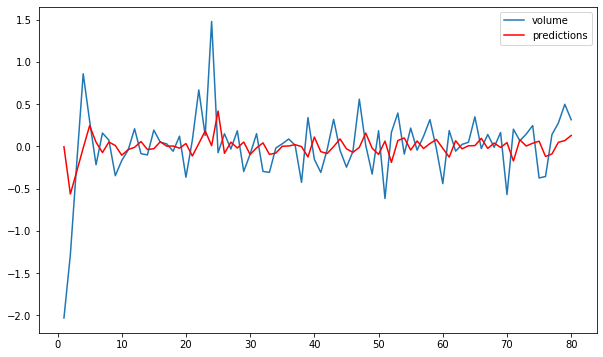

MAE: 0.2674623153562529
MSE: 0.1625486334155813
RMSE: 0.4031732052301855


In [510]:
x = modeling(tesla_shift, (1, 0, 1))

satysfaying results